In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in square
  # Remove the CWD from sys.path while we load stuff.
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


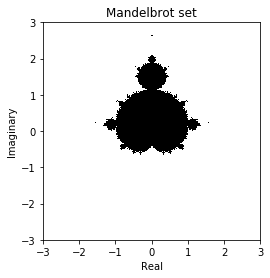

In [13]:
def mandelbrot(max_N, alpha, N):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2j, 2j, N)
    
    c = x[:, np.newaxis] + y[np.newaxis, :]
    
    z_0 = 0
    z = c
    for j in range(max_N):
        z = z**2 + c
        
    mandelbrot = (np.abs(z)) < alpha
    return mandelbrot

mandelbrot = mandelbrot(50, 50., 1000)
plt.imshow(mandelbrot, cmap='binary', extent=[-3, 3, -3, 3])
plt.title('Mandelbrot set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in square
  del sys.path[0]
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in absolute


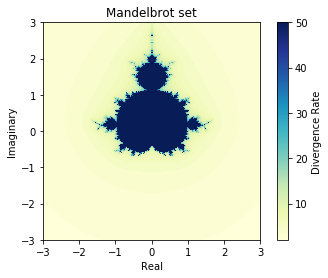

In [5]:
def mandelbrot_color(max_N, alpha, N):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2j, 2j, N)
    
    c = x[:, np.newaxis] + y[np.newaxis, :]
    
    mandelbrot_color = np.zeros((N, N))
     
    z_0 = 0
    z = c
    for j in range(max_N):
                                
        z = z**2 + c
        
        for h in range(N):
            for m in range(N):
                if (np.abs(z[h][m])) > alpha:
                    if mandelbrot_color[h][m] == 0:
                        mandelbrot_color[h][m] = (j + 1)
    for i in range(N):
        for m in range(N):
            if mandelbrot_color[i][m] == 0:
                mandelbrot_color [i][m] = max_N
                    
    return mandelbrot_color

mandelbrot_color = mandelbrot_color(50, 50.0, 400)


plt.imshow(mandelbrot_color, cmap='YlGnBu', extent=[-3, 3, -3, 3])
plt.colorbar().set_label('Divergence Rate')
plt.title('Mandelbrot set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in square
  del sys.path[0]
/Users/ChanFamily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in absolute


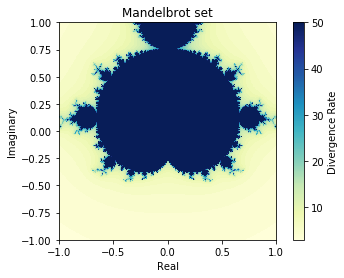

In [9]:
def mandelbrot_color(max_N, alpha, N):
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1j, 1j, N)
    
    c = x[:, np.newaxis] + y[np.newaxis, :]
    
    mandelbrot_color = np.zeros((N, N))
     
    z_0 = 0
    z = c
    for j in range(max_N):
                                
        z = z**2 + c
        
        for h in range(N):
            for m in range(N):
                if (np.abs(z[h][m])) > alpha:
                    if mandelbrot_color[h][m] == 0:
                        mandelbrot_color[h][m] = (j + 1)
    for i in range(N):
        for m in range(N):
            if mandelbrot_color[i][m] == 0:
                mandelbrot_color [i][m] = max_N
                    
    return mandelbrot_color

mandelbrot_color = mandelbrot_color(50, 50.0, 500)


plt.imshow(mandelbrot_color, cmap='YlGnBu', extent=[-1, 1, -1, 1])
plt.colorbar().set_label('Divergence Rate')
plt.title('Mandelbrot set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

Question 2

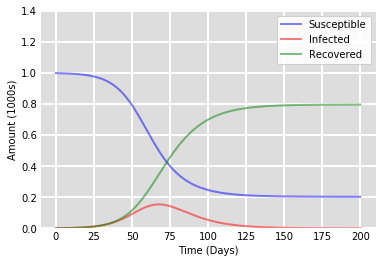

In [10]:
# Beta = 0.2, Gamma = 1./10

N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0

# Infection rate: 
beta = 0.2

# Recovery Rate
gamma = 1./10

# Time
t = np.linspace(0, 200, 200)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(t,S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t,I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t,R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Amount (1000s)')
ax.set_ylim(0, 1.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.9)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

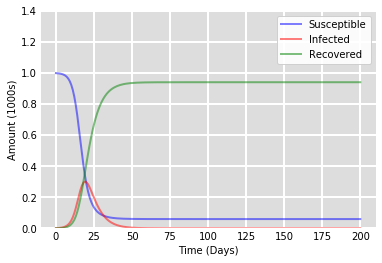

In [11]:
# Beta = 0.6, Gamma = 2./10
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0

# Infection rate: 
beta = 0.6

# Recovery Rate
gamma = 2./10

# Time
t = np.linspace(0, 200, 200)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(t,S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t,I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t,R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Amount (1000s)')
ax.set_ylim(0, 1.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.9)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

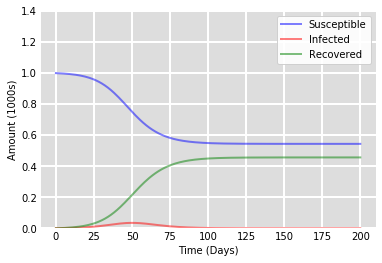

In [12]:
# Beta = 0.4, Gamma = 3./10
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0

# Infection rate: 
beta = 0.4

# Recovery Rate
gamma = 3./10

# Time
t = np.linspace(0, 200, 200)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(t,S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t,I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t,R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Amount (1000s)')
ax.set_ylim(0, 1.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.9)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()